Sigmoid


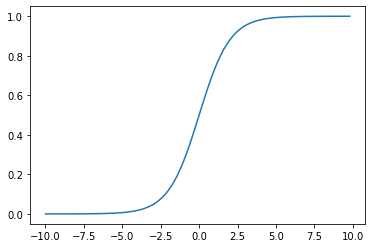

Hyperbolic Tangent(tanh)


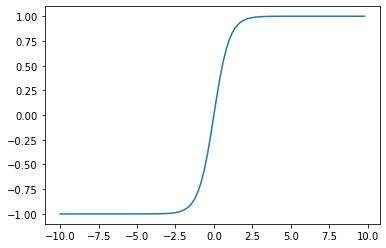

In [1]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import math

def sigmoid(x):
    a = []
    for item in x:
        a.append(1/(1+math.exp(-item)))
    return a

def f2(x):
    a = []
    for item in x:
        a.append(math.tanh(item))
    return a

x = np.arange(-10., 10., 0.2)
y1 = sigmoid(x)
y2 = f2(x)

print("Sigmoid")
plt.plot(x,y1)
plt.show()

print("Hyperbolic Tangent(tanh)")
plt.plot(x,y2)
plt.show()

In [2]:
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding
from tensorflow.keras.layers import LSTM
import numpy as np

max_features = 4 # 0,1,2,3 (total of 4)
x = [
    [[0],[1],[1],[0],[0],[0]],
    [[0],[0],[0],[2],[2],[0]],
    [[0],[0],[0],[0],[3],[3]],
    [[0],[2],[2],[0],[0],[0]],
    [[0],[0],[3],[3],[0],[0]],
    [[0],[0],[0],[0],[1],[1]]
]
x = np.array(x,dtype=np.float32)
y = np.array([1,2,3,2,3,1],dtype=np.int32)

# Convert y2 to dummy variables
y2 = np.zeros((y.shape[0], max_features),dtype=np.float32)
y2[np.arange(y.shape[0]), y] = 1.0
print(y2)

print('Build model...')
model = Sequential()
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2, input_shape=(None, 1)))
model.add(Dense(4, activation='sigmoid'))

# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
print('Train...')
model.fit(x,y2,epochs=200)
pred = model.predict(x)
predict_classes = np.argmax(pred,axis=1)
print("Predicted classes: {}",predict_classes)
print("Expected classes: {}",predict_classes)


[[0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]]
Build model...
Train...
Epoch 1/200
1/1 [==============================] - 0s 2ms/step - loss: 0.6939 - accuracy: 0.3333
Epoch 2/200
1/1 [==============================] - 0s 1ms/step - loss: 0.6852 - accuracy: 0.3333
Epoch 3/200
1/1 [==============================] - 0s 1ms/step - loss: 0.6767 - accuracy: 0.5000
Epoch 4/200
1/1 [==============================] - 0s 979us/step - loss: 0.6711 - accuracy: 0.3333
Epoch 5/200
1/1 [==============================] - 0s 2ms/step - loss: 0.6650 - accuracy: 0.5000
Epoch 6/200
1/1 [==============================] - 0s 2ms/step - loss: 0.6587 - accuracy: 0.3333
Epoch 7/200
1/1 [==============================] - 0s 2ms/step - loss: 0.6506 - accuracy: 0.5000
Epoch 8/200
1/1 [==============================] - 0s 2ms/step - loss: 0.6413 - accuracy: 0.5000
Epoch 9/200
1/1 [==============================] - 0s 893us/step - loss: 0.6267 - accuracy: 0.3333
Epoch 10

1/1 [==============================] - 0s 1ms/step - loss: 0.3208 - accuracy: 0.6667
Epoch 83/200
1/1 [==============================] - 0s 2ms/step - loss: 0.2478 - accuracy: 0.8333
Epoch 84/200
1/1 [==============================] - 0s 2ms/step - loss: 0.2620 - accuracy: 0.8333
Epoch 85/200
1/1 [==============================] - 0s 981us/step - loss: 0.2723 - accuracy: 0.6667
Epoch 86/200
1/1 [==============================] - 0s 881us/step - loss: 0.3131 - accuracy: 0.6667
Epoch 87/200
1/1 [==============================] - 0s 1ms/step - loss: 0.2806 - accuracy: 0.8333
Epoch 88/200
1/1 [==============================] - 0s 1ms/step - loss: 0.3483 - accuracy: 0.6667
Epoch 89/200
1/1 [==============================] - 0s 3ms/step - loss: 0.3099 - accuracy: 0.6667
Epoch 90/200
1/1 [==============================] - 0s 997us/step - loss: 0.4154 - accuracy: 0.6667
Epoch 91/200
1/1 [==============================] - 0s 948us/step - loss: 0.2833 - accuracy: 0.6667
Epoch 92/200
1/1 [=======

1/1 [==============================] - 0s 5ms/step - loss: 0.2658 - accuracy: 0.6667
Epoch 165/200
1/1 [==============================] - 0s 2ms/step - loss: 0.2811 - accuracy: 0.6667
Epoch 166/200
1/1 [==============================] - 0s 5ms/step - loss: 0.1978 - accuracy: 0.8333
Epoch 167/200
1/1 [==============================] - 0s 2ms/step - loss: 0.2237 - accuracy: 0.8333
Epoch 168/200
1/1 [==============================] - 0s 1ms/step - loss: 0.2664 - accuracy: 0.6667
Epoch 169/200
1/1 [==============================] - 0s 1ms/step - loss: 0.2723 - accuracy: 0.6667
Epoch 170/200
1/1 [==============================] - 0s 1ms/step - loss: 0.4431 - accuracy: 0.5000
Epoch 171/200
1/1 [==============================] - 0s 3ms/step - loss: 0.2864 - accuracy: 0.6667
Epoch 172/200
1/1 [==============================] - 0s 882us/step - loss: 0.2776 - accuracy: 0.6667
Epoch 173/200
1/1 [==============================] - 0s 2ms/step - loss: 0.1996 - accuracy: 0.8333
Epoch 174/200
1/1 [===

In [4]:
import pandas as pd

names = ['year', 'month', 'day', 'dec_year', 'sn_value' , 
         'sn_error', 'obs_num']

df = pd.read_csv('sunspot.csv',sep=';',header=None,names=names,na_values=['-1'],index_col=False)

print("Starting file:")
print(df[0:10])

print("Ending file:")
print(df[-10:])

Starting file:
   year  month  day  dec_year  sn_value  sn_error  obs_num
0  1818      1    1  1818.001        -1       NaN        0
1  1818      1    2  1818.004        -1       NaN        0
2  1818      1    3  1818.007        -1       NaN        0
3  1818      1    4  1818.010        -1       NaN        0
4  1818      1    5  1818.012        -1       NaN        0
5  1818      1    6  1818.015        -1       NaN        0
6  1818      1    7  1818.018        -1       NaN        0
7  1818      1    8  1818.021        65      10.2        1
8  1818      1    9  1818.023        -1       NaN        0
9  1818      1   10  1818.026        -1       NaN        0
Ending file:
       year  month  day  dec_year  sn_value  sn_error  obs_num
74013  2020      8   22  2020.641         0       0.0       47
74014  2020      8   23  2020.643         0       0.0       42
74015  2020      8   24  2020.646         0       0.0       46
74016  2020      8   25  2020.649         0       0.0       37
74017  2

In [5]:
start_id = max(df[df['obs_num'] == 0].index.tolist())+1  # Find the last zero and move one beyond
print(start_id)
df = df[start_id:] # Trim the rows that have missing observations

11314


In [9]:
df['sn_value'] = df['sn_value'].astype(float)
df_train = df[df['year']<2000]
df_test = df[df['year']>=2000]

spots_train = df_train['sn_value'].tolist()
spots_test = df_test['sn_value'].tolist()

print("Training set has {} observations.".format(len(spots_train)))
print("Test set has {} observations.".format(len(spots_test)))


Training set has 55160 observations.
Test set has 7549 observations.


In [10]:
import numpy as np

def to_sequences(seq_size, obs):
    x = []
    y = []

    for i in range(len(obs)-SEQUENCE_SIZE):
        #print(i)
        window = obs[i:(i+SEQUENCE_SIZE)]
        after_window = obs[i+SEQUENCE_SIZE]
        window = [[x] for x in window]
        #print("{} - {}".format(window,after_window))
        x.append(window)
        y.append(after_window)
        
    return np.array(x),np.array(y)
    
    
SEQUENCE_SIZE = 10
x_train,y_train = to_sequences(SEQUENCE_SIZE,spots_train)
x_test,y_test = to_sequences(SEQUENCE_SIZE,spots_test)

print("Shape of training set: {}".format(x_train.shape))
print("Shape of test set: {}".format(x_test.shape))

Shape of training set: (55150, 10, 1)
Shape of test set: (7539, 10, 1)


In [11]:
x_train


array([[[353.],
        [240.],
        [275.],
        ...,
        [340.],
        [238.],
        [287.]],

       [[240.],
        [275.],
        [352.],
        ...,
        [238.],
        [287.],
        [294.]],

       [[275.],
        [352.],
        [268.],
        ...,
        [287.],
        [294.],
        [342.]],

       ...,

       [[138.],
        [141.],
        [128.],
        ...,
        [116.],
        [ 95.],
        [ 85.]],

       [[141.],
        [128.],
        [130.],
        ...,
        [ 95.],
        [ 85.],
        [103.]],

       [[128.],
        [130.],
        [123.],
        ...,
        [ 85.],
        [103.],
        [ 66.]]])

In [12]:
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding
from tensorflow.keras.layers import LSTM
from tensorflow.keras.datasets import imdb
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np

print('Build model...')
model = Sequential()
model.add(LSTM(64, dropout=0.0, recurrent_dropout=0.0,input_shape=(None, 1)))
model.add(Dense(32))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, 
                        verbose=2, mode='auto', restore_best_weights=True)
print('Train...')

model.fit(x_train,y_train,validation_data=(x_test,y_test),
          callbacks=[monitor],verbose=2,epochs=1000)

Build model...
Train...
Epoch 1/1000
1724/1724 - 12s - loss: 1370.7405 - val_loss: 185.5287
Epoch 2/1000
1724/1724 - 11s - loss: 512.3945 - val_loss: 190.7712
Epoch 3/1000
1724/1724 - 14s - loss: 505.1109 - val_loss: 189.3777
Epoch 4/1000
1724/1724 - 15s - loss: 506.5404 - val_loss: 192.4722
Epoch 5/1000
1724/1724 - 11s - loss: 503.5066 - val_loss: 203.4298
Epoch 6/1000
Restoring model weights from the end of the best epoch.
1724/1724 - 10s - loss: 496.7450 - val_loss: 188.1809
Epoch 00006: early stopping


In [14]:
from sklearn import metrics

pred = model.predict(x_test)
score = np.sqrt(metrics.mean_squared_error(pred,y_test))
print("Score (RMSE): {}".format(score))

Score (RMSE): 13.620890149386108
